In [1]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import geom, kruskal , norm
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#load data
data_path = 'UPSC_attempts_simulated_dataset.xlsx'
df = pd.read_excel(data_path)

In [3]:
df.head()

,Selected,Attempts,Gender,Category,State,Background,Age,City
0,1,4,Male,Others,Nagaland,Humanities,30,Banglore
1,1,3,Male,General,Tamil Nadu,Medical,34,Banglore
2,0,3,Male,Others,Andhra Pradesh,Humanities,32,Delhi
3,1,10,Male,General,Chandigarh,Engineering,35,Chennai
4,0,4,Male,Others,Gujarat,Medical,25,Banglore


### Exploring dataset

In [13]:
#Filtering instances for those who got selection
df_selection = df[df['Selected'] == 1].reset_index().drop(columns= 'index')

In [14]:
df_selection.head()

,Selected,Attempts,Gender,Category,State,Background,Age,City
0,1,4,Male,Others,Nagaland,Humanities,30,Banglore
1,1,3,Male,General,Tamil Nadu,Medical,34,Banglore
2,1,10,Male,General,Chandigarh,Engineering,35,Chennai
3,1,7,Female,General,Nagaland,Medical,23,Mumbai
4,1,6,Male,General,Punjab,Humanities,24,Banglore


In [16]:
df_selection.count()

Selected      4975
Attempts      4975
Gender        4975
Category      4975
State         4975
Background    4975
Age           4975
City          4975
dtype: int64

In [19]:
#checking data types of all the fields
df_selection.dtypes

Selected       int64
Attempts       int64
Gender        object
Category      object
State         object
Background    object
Age            int64
City          object
dtype: object

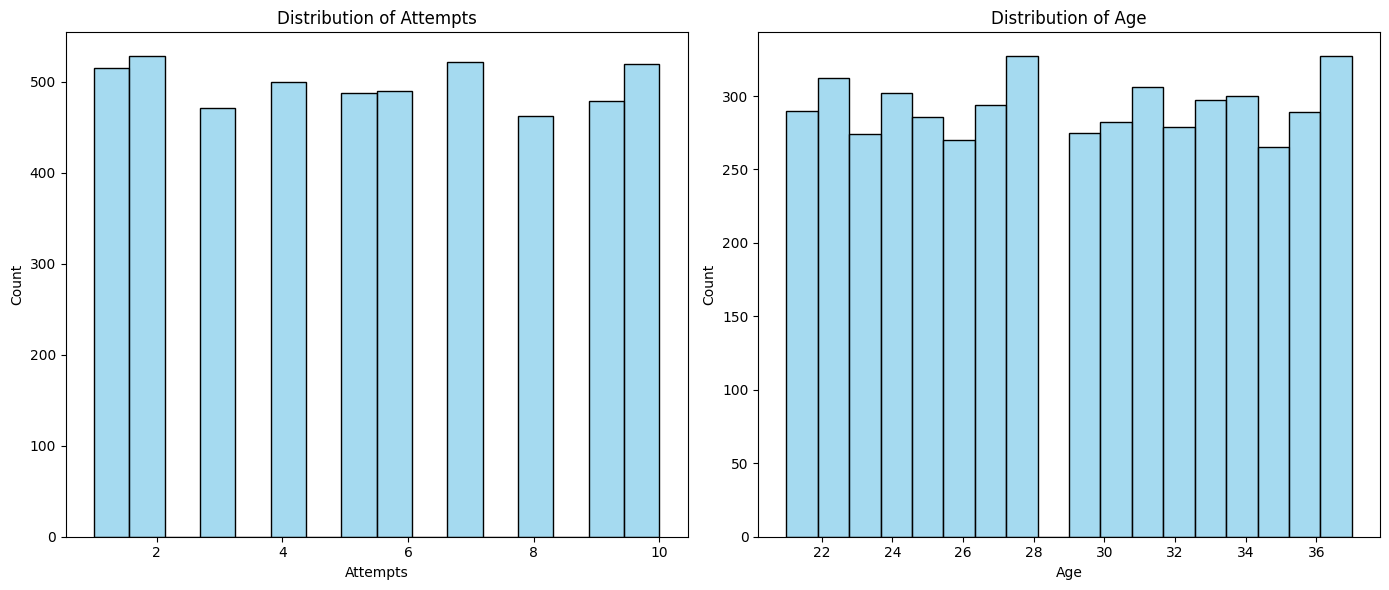

In [24]:
#Descriptive Statistics for the 'Attempts' and 'Age' fields
descriptive_stats = df_selection[['Attempts', 'Age']].describe()

#plotting the stats
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df_selection['Attempts'],
            color='skyblue')
plt.title('Distribution of Attempts')

plt.subplot(1,2,2)
sns.histplot(df_selection['Age'],
             color = 'skyblue' )
plt.title('Distribution of Age')
plt.tight_layout()

#### Viewing categorical data fields

In [31]:
#identifying object fields
categorical_fields = (df_selection
                     .select_dtypes(include=['object'])
                     .columns)


In [35]:
df_selection[categorical_fields].describe()

,Gender,Category,State,Background,City
count,4975,4975,4975,4975,4975
unique,2,2,34,4,4
top,Male,General,Telangana,Medical,Chennai
freq,2494,2499,168,1285,1263


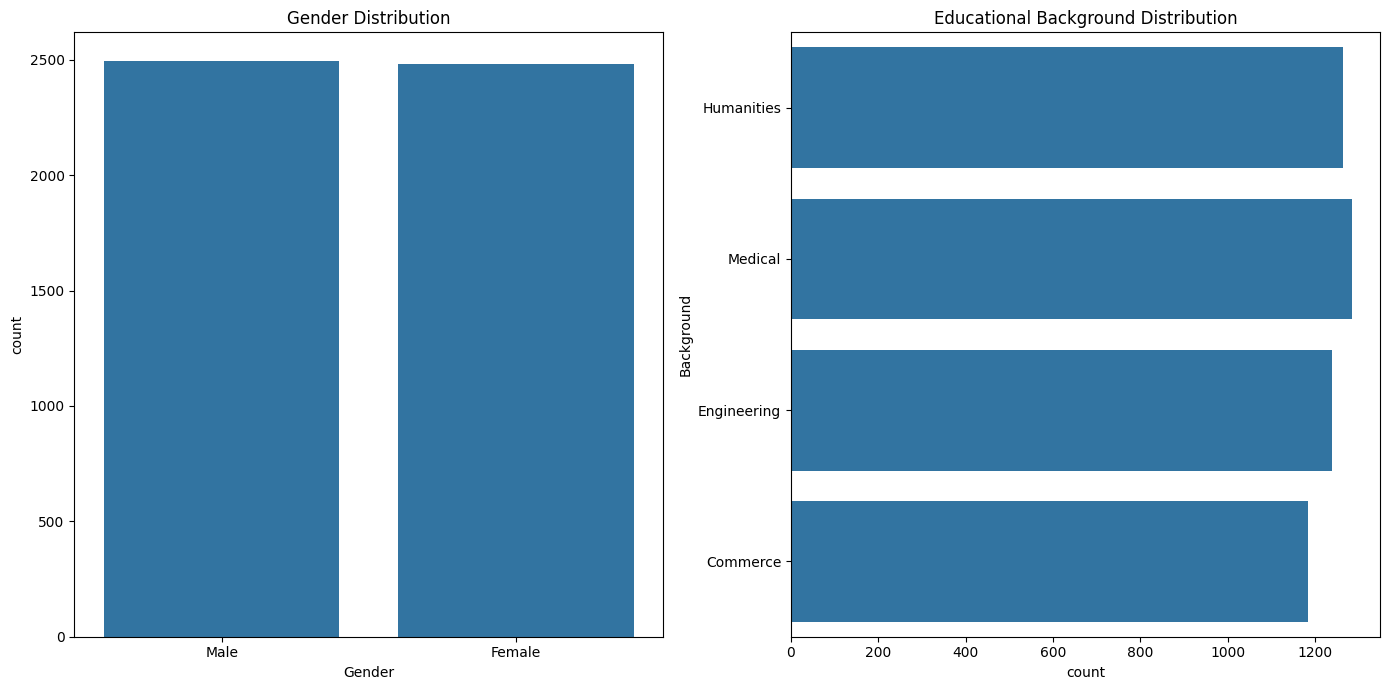

In [36]:
#Visual exploring Gender and Educational backgrounds
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.countplot(data = df_selection,
              x= 'Gender')
plt.title('Gender Distribution')

plt.subplot(1,2,2)
sns.countplot(data = df_selection,
              y = 'Background')
plt.title('Educational Background Distribution')
plt.tight_layout()

### Statistical Inference

### Maximum Likelihood Estimator (MLE) for Geometric Distribution

Given a random sample $ X_1, X_2, \ldots, X_n $ from a geometric distribution with parameter $ p $, the probability mass function (PMF) is:
$$ P(X = k) = (1 - p)^{k-1} p $$

The likelihood function $ L(p) $ for the sample is:
$$ L(p) = \prod_{i=1}^n (1 - p)^{X_i - 1} p = p^n (1 - p)^{\sum_{i=1}^n (X_i - 1)} $$

Taking the natural logarithm of the likelihood function, we get the log-likelihood function $ \ell(p) $:
$$ \ell(p) = \log L(p) = n \log p + \left( \sum_{i=1}^n (X_i - 1) \right) \log (1 - p) $$

To find the MLE, we take the derivative of the log-likelihood function with respect to $ p $ and set it to zero:
$$ \frac{d\ell(p)}{dp} = \frac{n}{p} - \frac{\sum_{i=1}^n (X_i - 1)}{1 - p} = 0 $$

Solving for $ p $, we get:
$$ \frac{n}{p} = \frac{\sum_{i=1}^n (X_i - 1)}{1 - p} $$
$$ n (1 - p) = p \sum_{i=1}^n (X_i - 1) $$
$$ n - np = p \sum_{i=1}^n (X_i - 1) $$
$$ n = p \left( n + \sum_{i=1}^n (X_i - 1) \right) $$
$$ p = \frac{n}{n + \sum_{i=1}^n (X_i - 1)} $$

Since $ \sum_{i=1}^n (X_i - 1) = \sum_{i=1}^n X_i - n $, we can simplify the expression for $ p $:
$$ p = \frac{n}{\sum_{i=1}^n X_i} $$

Thus, the MLE for the parameter $ p $ of the geometric distribution is:
$$ \hat{p} = \frac{n}{\sum_{i=1}^n X_i} $$


In [46]:
#Maximum Likelihood of the probability of sucess
n_success = len(df_selection)
sum_attempts = df_selection['Attempts'].sum()
p_hat = n_success/sum_attempts 

print(f'Value of the estimated parameter of underlying geometric ditribution is {round(p_hat,3)} ')

Value of the estimated parameter of underlying geometric ditribution is 0.183 


Text(0, 0.5, 'Probability')

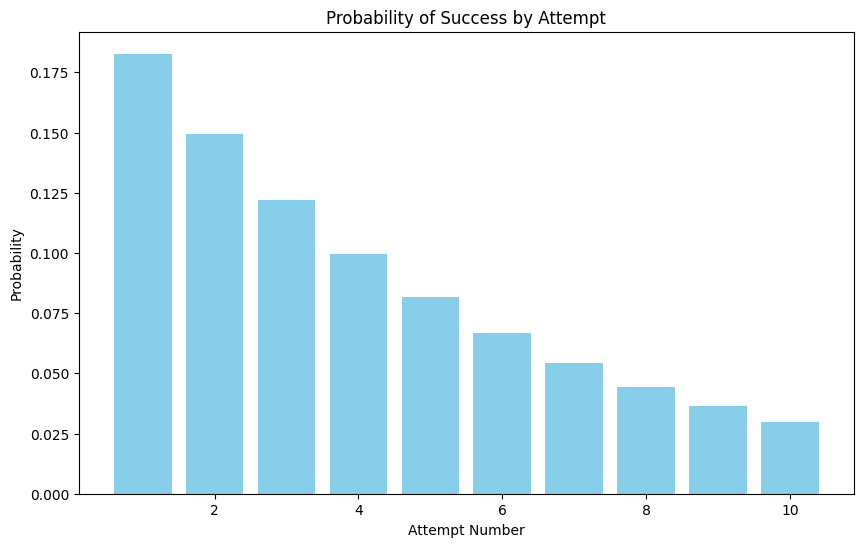

In [40]:
#Probability of sucess from 1 to 10 attempts
x_values = np.arange(1,11)
probabilities = geom.pmf(x_values, p_hat)

plt.figure(figsize = (10,6))
plt.bar(x_values, probabilities, color = 'skyblue')
plt.title('Probability of Success by Attempt')
plt.xlabel('Attempt Number')
plt.ylabel('Probability')

k values: [ 1  2  3  4  5  6  7  8  9 10]
CDF values: [0.18273646 0.3320803  0.45413358 0.55388327 0.63540506 0.70202985
 0.75647986 0.80097987 0.8373481  0.86707053]


Text(0, 0.5, 'Probability')

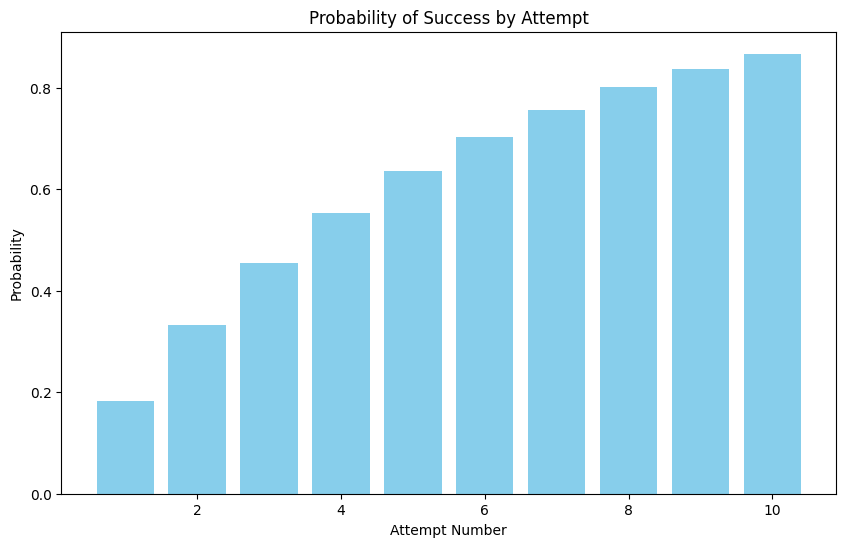

In [43]:
# Calculate the CDF for each value in k_values
cdf_values = geom.cdf(x_values, p_hat)

# Print the CDF values
print("k values:", x_values)
print("CDF values:", cdf_values)

plt.figure(figsize = (10,6))
plt.bar(x_values, cdf_values, color = 'skyblue')
plt.title('Probability of Success by Attempt')
plt.xlabel('Attempt Number')
plt.ylabel('Probability')

In [52]:
# Variance, Bias, and MRE of p_hat
var_p_hat = (p_hat * (1 - p_hat)) / n_success
print(f'Value of variance is close to zero-> var_p_hat = {var_p_hat}')

bias_p_hat = 0  # Assuming unbiased since we have large samples (count: 4975)

mse_p_hat = bias_p_hat ** 2 + var_p_hat

Value of variance is close to zero-> var_p_hat = 3.001886297653891e-05


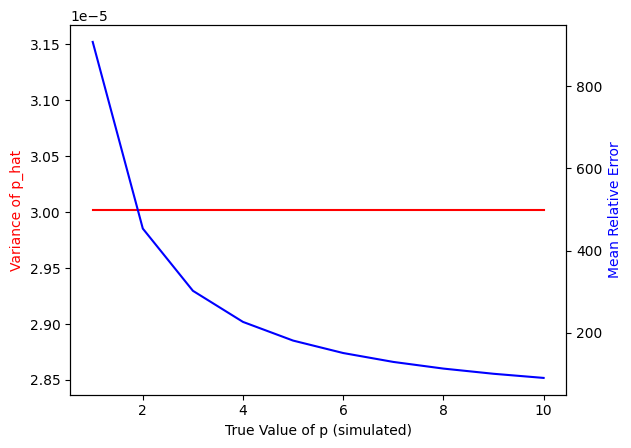

In [55]:
# Two y-axis plot for variance and MRE
mre_values = np.abs(p_hat - x_values/n_success) / (x_values/n_success)

fig, ax1 = plt.subplots()
ax1.set_xlabel('True Value of p (simulated)')
ax1.set_ylabel('Variance of p_hat', color='red')
ax1.plot(x_values, np.tile(var_p_hat, 10), color='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Mean Relative Error', color='blue')
ax2.plot(x_values, mre_values, color='blue')

In [60]:
# Confidence interval for p_hat
ci_lower = p_hat - 1.96 * np.sqrt(var_p_hat)
ci_upper = p_hat + 1.96 * np.sqrt(var_p_hat)

print(f'Confidence interval of estimated p_hat is [{round(ci_lower,3)}, {round(ci_upper,3)}]')

Confidence interval of estimated p_hat is [0.172, 0.193]


### Checking if inference difference based on the gender

In [67]:
#Maximum Likelihood of the probability of sucess by Gender
n_success_male = len(df_selection[(df_selection['Gender'] == 'Male')])
sum_attempts_male = df_selection[(df_selection['Gender'] == 'Male')]['Attempts'].sum()
p_hat_male = n_success_male/sum_attempts_male 

print(f'Value of the estimated parameter of underlying geometric ditribution for male is {round(p_hat,3)}')

#Maximum Likelihood of the probability of sucess by Gender
n_success_female = len(df_selection[(df_selection['Gender'] == 'Female')])
sum_attempts_female = df_selection[(df_selection['Gender'] == 'Female')]['Attempts'].sum()
p_hat_female = n_success_female/sum_attempts_female

print(f'Value of the estimated parameter of underlying geometric ditribution for female is {round(p_hat,3)}')

Value of the estimated parameter of underlying geometric ditribution for male is 0.183
Value of the estimated parameter of underlying geometric ditribution for female is 0.183


In [61]:
# Comparison of MLE based on gender using two paired z test
# male_selected_data = df_selection[(df_selection['Gender'] == 'Male')]['Attempts']
# female_selected_data = df_selection[(df_selection['Gender'] == 'Female')]['Attempts']

# count = np.array([len(male_selected_data), len(female_selected_data)])
# nobs = np.array([male_selected_data.sum(), female_selected_data.sum()])
stat, p_value_gender = proportions_ztest(count, nobs)

In [68]:
count

array([2494, 2481])

In [69]:
nobs

array([13722, 13503])